# The Sparks Foundation - GRIP July 2021
## Task 2 :  Prediction using Unsupervised ML
## By : Bhavya Jain

### Problem statement:
### From the given *‘Iris’* dataset, predict the optimum number of clusters and represent it visually.

## Importing libraries

In [43]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Collection

In [44]:
# loading dataset into pandas dataframe
df = pd.read_csv("Iris.csv") 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory data analysis

In [45]:
#getting shape of dataset
df.shape 

(150, 6)

In [46]:
#getting description of dataset
df.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [47]:
#checking null values
df.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data visualisation

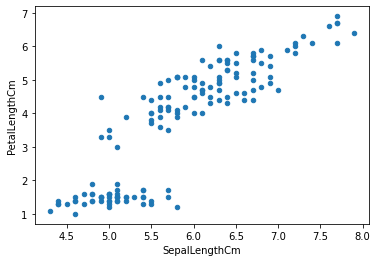

In [48]:
df.plot(kind = 'scatter', x = "SepalLengthCm", y = "PetalLengthCm" )
plt.show()

In [49]:
#dropping 2 columns "ID" and "Species" because they are irrelevant to us
df.drop(columns=["Id","Species"],axis=1,inplace=True)

## Choosing the optimum number of clusters

In [50]:
#Kmeans clustering
sq_sum=[] # List for saving the values of Within-Cluster sum of squares
for i in range(1,11): #for 10 clusters
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df) #To train the model and create classifier
    sq_sum.append(kmeans.inertia_) # To obtain the within cluster sum of square

In [51]:
sq_sum

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.190687924796634,
 30.063874432733137,
 27.84235606060608,
 26.04820224804435]

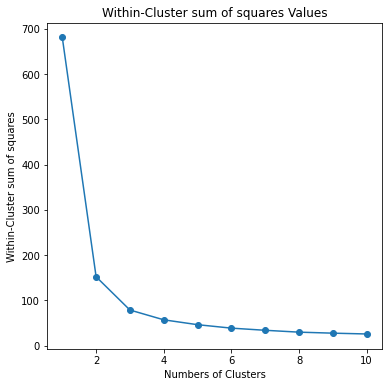

In [52]:
# plot the elbow graph to see which number of clusters has the minimum WCSS values
plt.figure(figsize=(6,6))
plt.plot(range(1,11),sq_sum,marker = 'o')
plt.title("Within-Cluster sum of squares Values")
plt.xlabel("Numbers of Clusters")
plt.ylabel("Within-Cluster sum of squares")
plt.show()

## Model training

In [53]:
# training the K-Means clustering model
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)

# return a label for each data points based on their clusters
y_pred=kmeans.fit_predict(df)

In [54]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualisation of Clusters

Text(0.5, 1.0, 'K-Means Clustering of Iris Data')

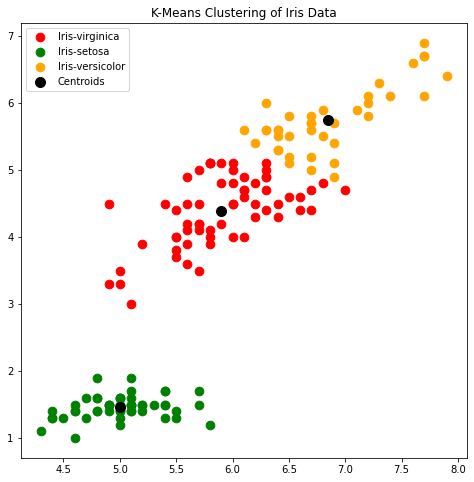

In [55]:
# plotting the datapoints and centroids
plt.figure(figsize=(8,8))
plt.scatter(df.iloc[y_pred==0,0],df.iloc[y_pred==0,2],s=75,c='red',label='Iris-virginica')
plt.scatter(df.iloc[y_pred==1,0],df.iloc[y_pred==1,2],s=75,c='green',label='Iris-setosa')
plt.scatter(df.iloc[y_pred==2,0],df.iloc[y_pred==2,2],s=75,c='orange',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c='black',label='Centroids')
plt.legend()
plt.title('K-Means Clustering of Iris Data')

# Result:
## Thus Optimum number of cluster is 3